# WeatherPy


#Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude, 
Humidity (%) vs. Latitude, 
Cloudiness (%) vs. Latitude, 
Wind Speed (mph) vs. Latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import random
from pprint import pprint
from collections import OrderedDict


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_lng = (43.2994 , 74.2179)

## Generate Cities List

In [22]:
# #1- giting the lat and logs of the nerest cities from the citypy

# lat = np.random.uniform(low=-90.000, high=90.000, size=10)
# lng = np.random.uniform(low=-180.000, high=180.000, size=10)

# lat[0], lng[0]

In [23]:
# #1.2 loop to get the lats and lngs of the number of cities we want
# lat_lng = []

# for i in range(len(lat)):
#     i=lat[i],lng[i]
#     #print(i)
#     lat_lng.append(i)
    
# #testing
# print(len(lat_lng))

In [24]:
# #testing
# citipy.nearest_city(lat,lng).city_name
# citipy.nearest_city(40.7128, 74.0060).country_code


In [25]:
# #1.3 get the cities data of the above lat_lng list

# cities = []

# for loc in lat_lng:
#     print(f"This is city nu # " + str(len(cities)+1))
#     print (loc)
#     lat = loc[0]
#     lng = loc[1]

#     city = citipy.nearest_city(lat,lng).city_name , citipy.nearest_city(lat,lng).country_code
    
#     #print(city)
#     print("*--------------------------------*")
#     cities.append(city)


# #print(cities)   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
#2 read the url of each city by json
# base_url = "http://api.openweathermap.org/data/2.5/weather?q=new york,us&appid=25f70f11d823a01fb8cf2860c0e875c1"
base_url = "http://api.openweathermap.org/data/2.5/weather?q=new%20york,us&appid=25f70f11d823a01fb8cf2860c0e875c1"
# query_url = f"{base_url}appid={api_key}&units={units}&q="

NY = req.get(base_url).json()
NY

{'coord': {'lon': -73.99, 'lat': 40.73},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 274.45,
  'pressure': 1021,
  'humidity': 41,
  'temp_min': 273.75,
  'temp_max': 275.35},
 'visibility': 16093,
 'wind': {'speed': 1.47, 'deg': 304.503},
 'clouds': {'all': 1},
 'dt': 1547574960,
 'sys': {'type': 1,
  'id': 5141,
  'message': 0.0048,
  'country': 'US',
  'sunrise': 1547554660,
  'sunset': 1547589231},
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [59]:
DF = pd.DataFrame(main, index = [0])
DF

ValueError: DataFrame constructor not properly called!

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Display the DataFrame

DF = pd.DataFrame(city_weather)
DF.head()

""


In [10]:
# reorder my columns in the DF

DF=DF[["City", "Country", "Lat", "Lng", "Max Temp", "Wind Speed", "Humidity","Cloudiness", "Date"]]
DF.head()

,City,Country,Lat,Lng,Max Temp,Wind Speed,Humidity,Cloudiness,Date
0,Vila Franca do Campo,PT,37.72,-25.43,69.80,2.24,88,20,1537673400
1,Castro,CL,-42.48,-73.76,45.57,7.20,100,88,1537675391
2,Dikson,RU,73.51,80.55,41.61,12.24,90,92,1537675391
3,East London,ZA,-33.02,27.91,57.20,4.70,82,0,1537671600
4,Amapa,HN,15.09,-87.97,75.20,3.36,88,75,1537675200


In [17]:
# Export the city data into a .csv.

DF.to_csv("HW#6_ WeatherPy.csv", index=True, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

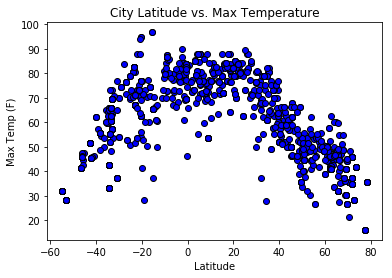

In [18]:
y_axisTemp = DF["Max Temp"]
x_axisTemp = DF["Lat"]

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(x_axisTemp, y_axisTemp, marker="o", facecolors="blue", edgecolors="black")

plt.savefig("Images/Latitude vs. Temperature.png")

Latitude vs. Temperature observation:

There is a strong relationship between latituse and temperature,
As expected, the weather becomes significantly warmer as one approaches the equator, and temperature dropes dowen when it gets close to the both ploes espicialy north pole 

#### Latitude vs. Humidity Plot

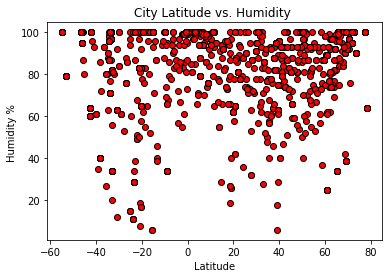

In [19]:
y_axisHumid = DF["Humidity"]
x_axisHumid = DF["Lat"]

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity % ")

plt.scatter(x_axisHumid, y_axisHumid, marker="o", facecolors="red", edgecolors="black")

plt.savefig("Images/Latitude vs. Humidity Plot.png")

Latitude vs. Humidity observation:

There is no strong relationship between lat and humidity, however its is interersting to see that humidity reaches 100% between lat (-20 and 80) 

#### Latitude vs. Cloudiness Plot

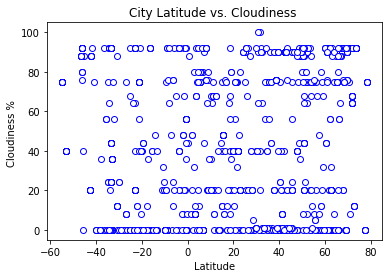

In [20]:
y_axisCloudiness = DF["Cloudiness"]
x_axisCloudiness = DF["Lat"]

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")

plt.scatter(x_axisCloudiness, y_axisCloudiness, marker="o", facecolors="white", edgecolors="blue")

plt.savefig("Images/Latitude vs. Cloudiness Plot.png")

There is slightly relationship between latitude and cloudiness. As it is interesting to see that a strong band of cities sits at 25, 80, and 100% cloudiness.

#### Latitude vs. Wind Speed Plot

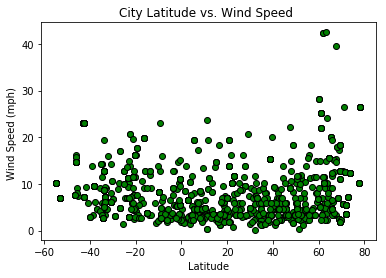

In [15]:
y_axisWind = DF["Wind Speed"]
x_axisWind = DF["Lat"]

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")

plt.scatter(x_axisWind, y_axisWind, marker="o", facecolors="green", edgecolors="black")

plt.savefig("Images/Latitude vs. Wind Speed Plot.png")

Observation of Latitude vs Speed:

There is no strong relationship between latitude and wind speed. 
However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [22]:
# This is another way (for me)
counter=0
for weather in city_weather:
    #print(weather)
    name = weather["Country"]
    tem = weather ["Max Temp"]
    #print(name)
      

